In [5]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
url_base = "https://raw.githubusercontent.com/TDila/classification-model-comparison/main/data/"

X_train = pd.read_csv(url_base + "processed_train.csv")
X_test = pd.read_csv(url_base + "processed_test.csv")
y_train = pd.read_csv(url_base + "train_labels.csv").values.ravel()
y_test = pd.read_csv(url_base + "test_labels.csv").values.ravel()

In [16]:
# Number of features and classes
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

In [17]:
# Build the model
model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(optimizer=Adam(),  # or SGD(), RMSprop()
              loss='sparse_categorical_crossentropy',  # because labels are not one-hot encoded
              metrics=['accuracy'])

In [19]:
# Train the model for at least 20 epochs
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5534 - loss: 1.0538 - val_accuracy: 0.7023 - val_loss: 0.7016
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7079 - loss: 0.7068 - val_accuracy: 0.7110 - val_loss: 0.6211
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7201 - loss: 0.6667 - val_accuracy: 0.7428 - val_loss: 0.5711
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7192 - loss: 0.5896 - val_accuracy: 0.7630 - val_loss: 0.5299
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7426 - loss: 0.5643 - val_accuracy: 0.7659 - val_loss: 0.4914
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7476 - loss: 0.5506 - val_accuracy: 0.8121 - val_loss: 0.4399
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7937 - loss: 0.4974 - val_accuracy: 0.8584 - val_loss: 0.3958
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.4610 - val_accuracy: 0.8613 - val_loss:

In [20]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.1799 
Test Accuracy: 0.9104


In [21]:
# Plot training & validation accuracy/loss values
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

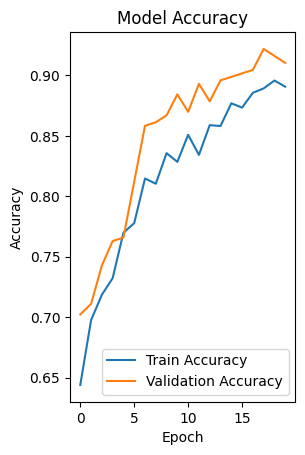

In [22]:
# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

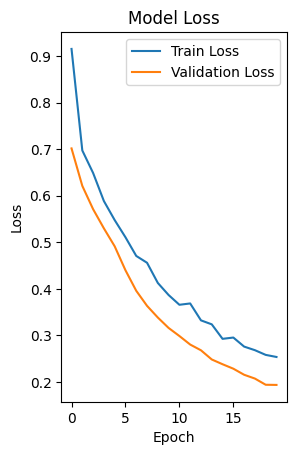

In [23]:
# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [24]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [25]:
# Save model to .h5 file
model.save('dnn_model.h5')